<a href="https://colab.research.google.com/github/muroo123/python/blob/main/WebCrawling_section2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

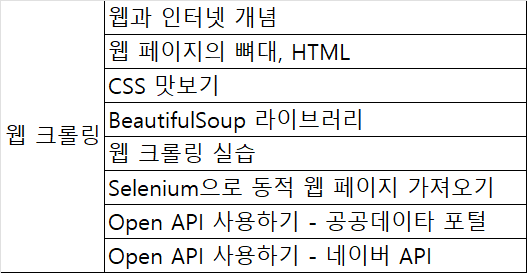

## BeautifulSoup 기초

### BeautifulSoup 특징
- 대표적인 파이썬 크롤링 패키지(라이브러리)
- HTML, XML, JSON 등 웹페이지를 표현하는 문서파일의 구문을 분석하기 위해 사용

https://beautiful-soup-4.readthedocs.io/en/latest/#
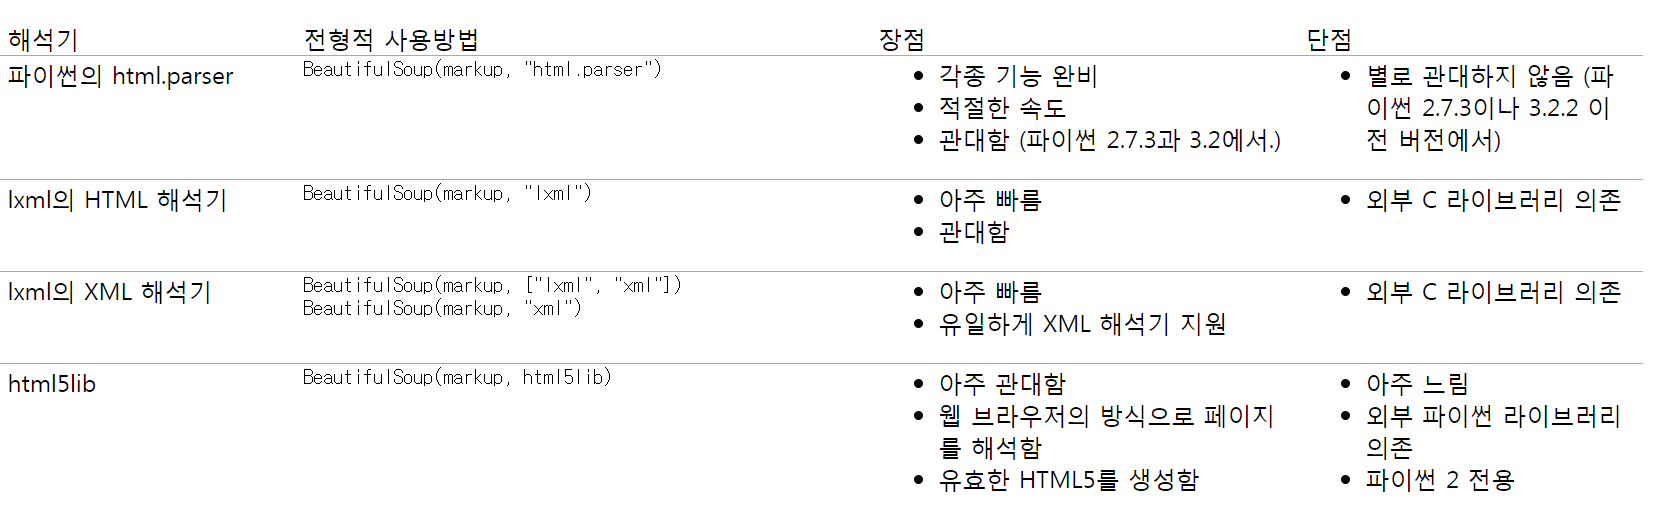



In [2]:
# 라이브러리 설치(쥬피터 사용자)
# bs4(Beautiful Soup)
!pip install bs4


In [3]:
# Python용 HTTP 라이브러리
!pip install requests

# 실습 기본태그

In [5]:
from bs4 import BeautifulSoup

In [117]:
html_doc = """
<!doctype html>
<html>
    <head>
        <title> 기초 크롤링 </title>
    </head>
    <body>
        <div>
            <a href="www.google.com"> 첫 번째 부분 </a>
        </div>
        <div id = "id1"> 두 번째 부분 </div>
    </body>
</html>
"""

In [118]:
# html_doc 문서를 html 파서를 사용하며 분석
soup = BeautifulSoup(html_doc, "html.parser")

# 생성된 객체 내용 보기
soup


<!DOCTYPE html>

<html>
<head>
<title> 기초 크롤링 </title>
</head>
<body>
<div>
<a href="www.google.com"> 첫 번째 부분 </a>
</div>
<div id="id1"> 두 번째 부분 </div>
</body>
</html>

In [ ]:
dir(soup)

In [119]:
# html 출력 이쁘게 하기
# prettify() BeautifulSoup 파싱 트리를 보기 좋게 변환
# HTML/XML 태그마다 따로따로 한 줄에 표시된다:

soup.prettify()

'<!DOCTYPE html>\n<html>\n <head>\n  <title>\n   기초 크롤링\n  </title>\n </head>\n <body>\n  <div>\n   <a href="www.google.com">\n    첫 번째 부분\n   </a>\n  </div>\n  <div id="id1">\n   두 번째 부분\n  </div>\n </body>\n</html>\n'

In [120]:
# html 출력 이쁘게 하기
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   기초 크롤링
  </title>
 </head>
 <body>
  <div>
   <a href="www.google.com">
    첫 번째 부분
   </a>
  </div>
  <div id="id1">
   두 번째 부분
  </div>
 </body>
</html>



In [121]:
# htmle Tag 객체 호출 가능
print(soup.body.prettify())

<body>
 <div>
  <a href="www.google.com">
   첫 번째 부분
  </a>
 </div>
 <div id="id1">
  두 번째 부분
 </div>
</body>



## HTML 태그 파싱

In [122]:
soup.title

<title> 기초 크롤링 </title>

In [123]:
soup.title.name

'title'

In [124]:
soup.title.string

' 기초 크롤링 '

In [125]:
soup.title.parent

<head>
<title> 기초 크롤링 </title>
</head>

In [126]:
soup.title.parent.name

'head'

## HTML 태그 검색
- find() : 해당 조건에 맞는 하나의 태그를 가져옴
- find_all() : 해당 조건에 맞는 모든 태그를 가져옴
- select() : CSS 선택자와 같은 형식으로 선택 가능



In [72]:
head = soup.find("head")
print(head)

<head>
<title> 기초 크롤링 </title>
</head>


In [73]:
body = soup.find("body")
print(body)

<body>
<div>
<a href="www.google.com"> 첫 번째 부분 </a>
</div>
<div id="id1"> 두 번째 부분 </div>
</body>


In [127]:
div1 = soup.find("div")
print(div1)

<div>
<a href="www.google.com"> 첫 번째 부분 </a>
</div>


In [128]:
# find_all() 결과 list 형태로 반환
div_total = soup.find_all("div")
print(div_total)

[<div>
<a href="www.google.com"> 첫 번째 부분 </a>
</div>, <div id="id1"> 두 번째 부분 </div>]


In [129]:
div2 = div_total[1]
print(div2)
print(div2.text)

<div id="id1"> 두 번째 부분 </div>
 두 번째 부분 


In [130]:
# 태크 속성값으로 찾을수 있음
div_id = soup.find_all("div",{"id":"id1"} )
print(div_id)

[<div id="id1"> 두 번째 부분 </div>]


In [131]:
# a태그 가져오기
soup.find("a")

<a href="www.google.com"> 첫 번째 부분 </a>

In [132]:
# a 태그 속 url값 가져오기
soup.find("a").get("href")

'www.google.com'

In [133]:
# a 태그 속 text값 가져오기
soup.find("a").get_text()

' 첫 번째 부분 '

In [135]:
#select() css 선택자
soup.select("body")

[<body>
 <div>
 <a href="www.google.com"> 첫 번째 부분 </a>
 </div>
 <div id="id1"> 두 번째 부분 </div>
 </body>]

In [137]:
# id로 태그 찾기
id1 = soup.select("div#id1")
id1

[<div id="id1"> 두 번째 부분 </div>]

In [136]:
# id로 태그 찾기
id1 = soup.select("#id1")
id1

[<div id="id1"> 두 번째 부분 </div>]

In [138]:
# 속성으로 찾기
soup.select('a[href]')

[<a href="www.google.com"> 첫 번째 부분 </a>]

# 크롤링 연습1

In [ ]:
from urllib.request import urlopen

url = "https://ai-dev.tistory.com/1"
html = urlopen(url)

In [ ]:
print(html.read())

b'<!doctype html>\n<html lang="ko">\n<head>\n<link rel="stylesheet" type="text/css" href="https://t1.daumcdn.net/tistory_admin/lib/lightbox/css/lightbox.min.css" /><link rel="stylesheet" type="text/css" href="https://t1.daumcdn.net/tistory_admin/assets/blog/tistory-bd96dd17334b8ce2f37206f86a83458bf1d3362c/blogs/style/content/font.css?_version_=tistory-bd96dd17334b8ce2f37206f86a83458bf1d3362c" /><link rel="stylesheet" type="text/css" href="https://t1.daumcdn.net/tistory_admin/assets/blog/tistory-bd96dd17334b8ce2f37206f86a83458bf1d3362c/blogs/style/content/content.css?_version_=tistory-bd96dd17334b8ce2f37206f86a83458bf1d3362c" /><!--[if lt IE 9]><script src="https://t1.daumcdn.net/tistory_admin/lib/jquery/jquery-1.12.4.min.js"></script><![endif]--><!--[if gte IE 9]>\n<!--><script src="https://t1.daumcdn.net/tistory_admin/lib/jquery/jquery-3.2.1.min.js"></script><!--<![endif]-->\n<script src="https://t1.daumcdn.net/tistory_admin/lib/lightbox/js/lightbox-plus-jquery.min.js"></script>\n<scr

In [139]:
dir(html)

['__abstractmethods__',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_abc_impl',
 '_checkClosed',
 '_checkReadable',
 '_checkSeekable',
 '_checkWritable',
 '_check_close',
 '_close_conn',
 '_get_chunk_left',
 '_method',
 '_peek_chunked',
 '_read1_chunked',
 '_read_and_discard_trailer',
 '_read_chunked',
 '_read_next_chunk_size',
 '_read_status',
 '_readinto_chunked',
 '_safe_read',
 '_safe_readinto',
 'begin',
 'chunk_left',
 'chunked',
 'close',
 'closed',
 'code',
 'debuglevel',
 'detach',
 'fileno',
 'flush',
 'fp',
 'getcode',
 'getheader',
 'getheaders',
 'geturl',
 'headers',
 'info',
 'isatty',
 'isclosed',
 '

# 제목 추출하기

In [84]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

url = "https://ai-dev.tistory.com/1"
html = urlopen(url)
soup1 = BeautifulSoup(html, "html.parser")

In [85]:
print(soup1)

<!DOCTYPE html>

<html lang="ko">
<head>
<script type="text/javascript">if (!window.T) { window.T = {} }
window.T.config = {"TOP_SSL_URL":"https://www.tistory.com","PREVIEW":false,"ROLE":"guest","PREV_PAGE":"","NEXT_PAGE":"","BLOG":{"id":4442027,"name":"ai-dev","title":"인공지능 개발의 모든 것","isDormancy":false,"nickName":"로스카츠","status":"open","profileStatus":"normal"},"NEED_COMMENT_LOGIN":false,"COMMENT_LOGIN_CONFIRM_MESSAGE":"","LOGIN_URL":"https://www.tistory.com/auth/login/?redirectUrl=https://ai-dev.tistory.com/1","DEFAULT_URL":"https://ai-dev.tistory.com","USER":{"name":null,"homepage":null,"id":0,"profileImage":null},"SUBSCRIPTION":{"status":"none","isConnected":false,"isPending":false,"isWait":false,"isProcessing":false,"isNone":true},"IS_LOGIN":false,"HAS_BLOG":false,"IS_SUPPORT":false,"TOP_URL":"http://www.tistory.com","JOIN_URL":"https://www.tistory.com/member/join","ROLE_GROUP":"visitor"};
window.T.entryInfo = {"entryId":1,"isAuthor":false,"categoryId":836119,"categoryLabel":"크롤링"

In [86]:
title = soup1.find_all("h1")

In [87]:
print(title)

[<h1><a href="https://ai-dev.tistory.com/">인공지능 개발의 모든 것</a></h1>, <h1>크롤링의 세계에 오신 것을 환영합니다. </h1>]


In [88]:
print(title[1])

<h1>크롤링의 세계에 오신 것을 환영합니다. </h1>


In [89]:
print(title[1].text)

크롤링의 세계에 오신 것을 환영합니다. 


# 게시물 내용 추출하기

In [90]:
contents = soup1.find_all("p")

In [91]:
print(contents)

[<p>POWERED BY TISTORY</p>, <p>Hello, world!</p>, <p class="copyright">DESIGN BY <a href="#">TISTORY</a> <a class="admin" href="https://ai-dev.tistory.com/manage">관리자</a></p>, <p class="desc_g"></p>]


In [92]:
print(contents[1])

<p>Hello, world!</p>


In [93]:
print(contents[1].text)

Hello, world!


# 전체 코드

In [94]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

url = "https://ai-dev.tistory.com/1?category=836119"
html = urlopen(url)
soup1 = BeautifulSoup(html, "html.parser")

# 제목 추출
title = soup1.find_all("h1")
print(title)
print(title[1])
print(title[1].text)

# 본문 내용 추출
contents = soup1.find_all("p")
print(contents)
print(contents[1])
print(contents[1].text)

[<h1><a href="https://ai-dev.tistory.com/">인공지능 개발의 모든 것</a></h1>, <h1>크롤링의 세계에 오신 것을 환영합니다. </h1>]
<h1>크롤링의 세계에 오신 것을 환영합니다. </h1>
크롤링의 세계에 오신 것을 환영합니다. 
[<p>POWERED BY TISTORY</p>, <p>Hello, world!</p>, <p class="copyright">DESIGN BY <a href="#">TISTORY</a> <a class="admin" href="https://ai-dev.tistory.com/manage">관리자</a></p>, <p class="desc_g"></p>]
<p>Hello, world!</p>
Hello, world!


# 크롤링 연습2

In [95]:
from urllib.request import urlopen

url = "https://ai-dev.tistory.com/2"
html = urlopen(url)

In [ ]:
print(html.read())

b'<!doctype html>\n<html lang="ko">\n<head>\n<link rel="stylesheet" type="text/css" href="https://t1.daumcdn.net/tistory_admin/lib/lightbox/css/lightbox.min.css" /><link rel="stylesheet" type="text/css" href="https://t1.daumcdn.net/tistory_admin/assets/blog/tistory-bd96dd17334b8ce2f37206f86a83458bf1d3362c/blogs/style/content/font.css?_version_=tistory-bd96dd17334b8ce2f37206f86a83458bf1d3362c" /><link rel="stylesheet" type="text/css" href="https://t1.daumcdn.net/tistory_admin/assets/blog/tistory-bd96dd17334b8ce2f37206f86a83458bf1d3362c/blogs/style/content/content.css?_version_=tistory-bd96dd17334b8ce2f37206f86a83458bf1d3362c" /><!--[if lt IE 9]><script src="https://t1.daumcdn.net/tistory_admin/lib/jquery/jquery-1.12.4.min.js"></script><![endif]--><!--[if gte IE 9]>\n<!--><script src="https://t1.daumcdn.net/tistory_admin/lib/jquery/jquery-3.2.1.min.js"></script><!--<![endif]-->\n<script src="https://t1.daumcdn.net/tistory_admin/lib/lightbox/js/lightbox-plus-jquery.min.js"></script>\n<scr

In [96]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

url = "https://ai-dev.tistory.com/2"
html = urlopen(url)
soup2 = BeautifulSoup(html, "html.parser")

In [97]:
print(soup2)

<!DOCTYPE html>

<html lang="ko">
<head>
<script type="text/javascript">if (!window.T) { window.T = {} }
window.T.config = {"TOP_SSL_URL":"https://www.tistory.com","PREVIEW":false,"ROLE":"guest","PREV_PAGE":"","NEXT_PAGE":"","BLOG":{"id":4442027,"name":"ai-dev","title":"인공지능 개발의 모든 것","isDormancy":false,"nickName":"로스카츠","status":"open","profileStatus":"normal"},"NEED_COMMENT_LOGIN":false,"COMMENT_LOGIN_CONFIRM_MESSAGE":"","LOGIN_URL":"https://www.tistory.com/auth/login/?redirectUrl=https://ai-dev.tistory.com/2","DEFAULT_URL":"https://ai-dev.tistory.com","USER":{"name":null,"homepage":null,"id":0,"profileImage":null},"SUBSCRIPTION":{"status":"none","isConnected":false,"isPending":false,"isWait":false,"isProcessing":false,"isNone":true},"IS_LOGIN":false,"HAS_BLOG":false,"IS_SUPPORT":false,"TOP_URL":"http://www.tistory.com","JOIN_URL":"https://www.tistory.com/member/join","ROLE_GROUP":"visitor"};
window.T.entryInfo = {"entryId":2,"isAuthor":false,"categoryId":836119,"categoryLabel":"크롤링"

In [98]:
table_tag = soup2.find_all("table")

In [99]:
table_tag

[<table border="1" data-ke-align="alignLeft" data-ke-style="style1" style="border-collapse: collapse; width: 100%;">
 <tbody>
 <tr>
 <td style="width: 33.3333%; text-align: center;">상품</td>
 <td style="width: 33.3333%; text-align: center;">색상</td>
 <td style="width: 33.3333%; text-align: center;">가격</td>
 </tr>
 <tr>
 <td style="width: 33.3333%; text-align: center;">셔츠1</td>
 <td style="width: 33.3333%; text-align: center;">빨강</td>
 <td style="width: 33.3333%; text-align: center;">20000</td>
 </tr>
 <tr>
 <td style="width: 33.3333%; text-align: center;">셔츠2</td>
 <td style="width: 33.3333%; text-align: center;">파랑</td>
 <td style="width: 33.3333%; text-align: center;">19000</td>
 </tr>
 <tr>
 <td style="width: 33.3333%; text-align: center;">셔츠3</td>
 <td style="width: 33.3333%; text-align: center;">초록</td>
 <td style="width: 33.3333%; text-align: center;">18000</td>
 </tr>
 <tr>
 <td style="width: 33.3333%; text-align: center;">바지1</td>
 <td style="width: 33.3333%; text-align: center;"

In [100]:
table_tag[0]

<table border="1" data-ke-align="alignLeft" data-ke-style="style1" style="border-collapse: collapse; width: 100%;">
<tbody>
<tr>
<td style="width: 33.3333%; text-align: center;">상품</td>
<td style="width: 33.3333%; text-align: center;">색상</td>
<td style="width: 33.3333%; text-align: center;">가격</td>
</tr>
<tr>
<td style="width: 33.3333%; text-align: center;">셔츠1</td>
<td style="width: 33.3333%; text-align: center;">빨강</td>
<td style="width: 33.3333%; text-align: center;">20000</td>
</tr>
<tr>
<td style="width: 33.3333%; text-align: center;">셔츠2</td>
<td style="width: 33.3333%; text-align: center;">파랑</td>
<td style="width: 33.3333%; text-align: center;">19000</td>
</tr>
<tr>
<td style="width: 33.3333%; text-align: center;">셔츠3</td>
<td style="width: 33.3333%; text-align: center;">초록</td>
<td style="width: 33.3333%; text-align: center;">18000</td>
</tr>
<tr>
<td style="width: 33.3333%; text-align: center;">바지1</td>
<td style="width: 33.3333%; text-align: center;">검정</td>
<td style="width

In [101]:
table_tag01 = table_tag[0].find_all("td")

In [102]:
table_tag01

[<td style="width: 33.3333%; text-align: center;">상품</td>,
 <td style="width: 33.3333%; text-align: center;">색상</td>,
 <td style="width: 33.3333%; text-align: center;">가격</td>,
 <td style="width: 33.3333%; text-align: center;">셔츠1</td>,
 <td style="width: 33.3333%; text-align: center;">빨강</td>,
 <td style="width: 33.3333%; text-align: center;">20000</td>,
 <td style="width: 33.3333%; text-align: center;">셔츠2</td>,
 <td style="width: 33.3333%; text-align: center;">파랑</td>,
 <td style="width: 33.3333%; text-align: center;">19000</td>,
 <td style="width: 33.3333%; text-align: center;">셔츠3</td>,
 <td style="width: 33.3333%; text-align: center;">초록</td>,
 <td style="width: 33.3333%; text-align: center;">18000</td>,
 <td style="width: 33.3333%; text-align: center;">바지1</td>,
 <td style="width: 33.3333%; text-align: center;">검정</td>,
 <td style="width: 33.3333%; text-align: center;">50000</td>,
 <td style="width: 33.3333%; text-align: center;">바지2</td>,
 <td style="width: 33.3333%; text-align

In [103]:
for idx, element in enumerate(table_tag01):
    print(idx, element.text)

0 상품
1 색상
2 가격
3 셔츠1
4 빨강
5 20000
6 셔츠2
7 파랑
8 19000
9 셔츠3
10 초록
11 18000
12 바지1
13 검정
14 50000
15 바지2
16 파랑
17 51000


In [105]:
table01 = soup2.find_all("td")

In [106]:
table01

[<td style="width: 33.3333%; text-align: center;">상품</td>,
 <td style="width: 33.3333%; text-align: center;">색상</td>,
 <td style="width: 33.3333%; text-align: center;">가격</td>,
 <td style="width: 33.3333%; text-align: center;">셔츠1</td>,
 <td style="width: 33.3333%; text-align: center;">빨강</td>,
 <td style="width: 33.3333%; text-align: center;">20000</td>,
 <td style="width: 33.3333%; text-align: center;">셔츠2</td>,
 <td style="width: 33.3333%; text-align: center;">파랑</td>,
 <td style="width: 33.3333%; text-align: center;">19000</td>,
 <td style="width: 33.3333%; text-align: center;">셔츠3</td>,
 <td style="width: 33.3333%; text-align: center;">초록</td>,
 <td style="width: 33.3333%; text-align: center;">18000</td>,
 <td style="width: 33.3333%; text-align: center;">바지1</td>,
 <td style="width: 33.3333%; text-align: center;">검정</td>,
 <td style="width: 33.3333%; text-align: center;">50000</td>,
 <td style="width: 33.3333%; text-align: center;">바지2</td>,
 <td style="width: 33.3333%; text-align

In [107]:
table = soup2.find_all("td", {"style":"width: 33.3333%; text-align: center;"})
table

[<td style="width: 33.3333%; text-align: center;">상품</td>,
 <td style="width: 33.3333%; text-align: center;">색상</td>,
 <td style="width: 33.3333%; text-align: center;">가격</td>,
 <td style="width: 33.3333%; text-align: center;">셔츠1</td>,
 <td style="width: 33.3333%; text-align: center;">빨강</td>,
 <td style="width: 33.3333%; text-align: center;">20000</td>,
 <td style="width: 33.3333%; text-align: center;">셔츠2</td>,
 <td style="width: 33.3333%; text-align: center;">파랑</td>,
 <td style="width: 33.3333%; text-align: center;">19000</td>,
 <td style="width: 33.3333%; text-align: center;">셔츠3</td>,
 <td style="width: 33.3333%; text-align: center;">초록</td>,
 <td style="width: 33.3333%; text-align: center;">18000</td>,
 <td style="width: 33.3333%; text-align: center;">바지1</td>,
 <td style="width: 33.3333%; text-align: center;">검정</td>,
 <td style="width: 33.3333%; text-align: center;">50000</td>,
 <td style="width: 33.3333%; text-align: center;">바지2</td>,
 <td style="width: 33.3333%; text-align

In [108]:
for idx, element in enumerate(table):
    print(idx, element)

0 <td style="width: 33.3333%; text-align: center;">상품</td>
1 <td style="width: 33.3333%; text-align: center;">색상</td>
2 <td style="width: 33.3333%; text-align: center;">가격</td>
3 <td style="width: 33.3333%; text-align: center;">셔츠1</td>
4 <td style="width: 33.3333%; text-align: center;">빨강</td>
5 <td style="width: 33.3333%; text-align: center;">20000</td>
6 <td style="width: 33.3333%; text-align: center;">셔츠2</td>
7 <td style="width: 33.3333%; text-align: center;">파랑</td>
8 <td style="width: 33.3333%; text-align: center;">19000</td>
9 <td style="width: 33.3333%; text-align: center;">셔츠3</td>
10 <td style="width: 33.3333%; text-align: center;">초록</td>
11 <td style="width: 33.3333%; text-align: center;">18000</td>
12 <td style="width: 33.3333%; text-align: center;">바지1</td>
13 <td style="width: 33.3333%; text-align: center;">검정</td>
14 <td style="width: 33.3333%; text-align: center;">50000</td>
15 <td style="width: 33.3333%; text-align: center;">바지2</td>
16 <td style="width: 33.3333%; te

In [109]:
for idx, element in enumerate(table):
    print(idx, element.text)

0 상품
1 색상
2 가격
3 셔츠1
4 빨강
5 20000
6 셔츠2
7 파랑
8 19000
9 셔츠3
10 초록
11 18000
12 바지1
13 검정
14 50000
15 바지2
16 파랑
17 51000


# 리스트

In [110]:
com_list = soup2.find_all("li")

In [111]:
com_list

[<li class=""><a class="link_tit" href="/category"> 분류 전체보기 <span class="c_cnt">(2)</span> </a>
 <ul class="category_list"><li class=""><a class="link_item" href="/category/%ED%81%AC%EB%A1%A4%EB%A7%81"> 크롤링 <span class="c_cnt">(2)</span> </a></li>
 </ul>
 </li>,
 <li class=""><a class="link_item" href="/category/%ED%81%AC%EB%A1%A4%EB%A7%81"> 크롤링 <span class="c_cnt">(2)</span> </a></li>,
 <li>모니터</li>,
 <li>CPU</li>,
 <li>메모리</li>,
 <li>그래픽카드</li>,
 <li>하드디스크</li>,
 <li>키보드</li>,
 <li>마우스</li>,
 <li>
 <a href="/1?category=836119">
 <span class="thum">
 </span>
 <span class="title">크롤링의 세계에 오신 것을 환영합니다.</span>
 </a>
 </li>]

In [112]:
com_list01 = soup2.find_all("ul",{"style":"list-style-type: disc;"})

In [113]:
com_list01

[<ul data-ke-list-type="disc" style="list-style-type: disc;">
 <li>모니터</li>
 <li>CPU</li>
 <li>메모리</li>
 <li>그래픽카드</li>
 <li>하드디스크</li>
 <li>키보드</li>
 <li>마우스</li>
 </ul>]

In [114]:
com_list02 = com_list01[0].find_all("li")

In [115]:
for idx, element in enumerate(com_list02):
    print(idx, element.text)

0 모니터
1 CPU
2 메모리
3 그래픽카드
4 하드디스크
5 키보드
6 마우스
